In [2]:
import numpy as np
from subprocess import getoutput
import requests
import sys
import ssl
import pandas as pd
from OpenSSL import crypto
import matplotlib.pyplot as plt
import pandas as pd
import os
from Crypto.PublicKey import RSA
from tqdm import tqdm
from functools import reduce
from collections import Counter

In [3]:
filename = 'entropy.txt'
data = open(filename).read().splitlines()


In [4]:
data = np.array(data).astype(np.int32)
x = np.arange(len(data))/2
print(data)

[3811 3811 3812 ... 3254 3260 3266]


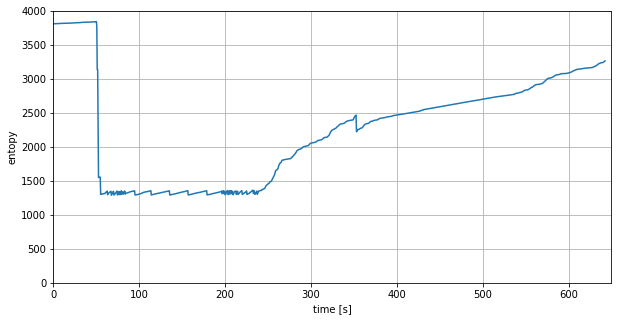

In [5]:
plt.figure(figsize=(10,5))
plt.plot(x,data)
plt.xlabel('time [s]')
plt.ylabel("entopy")
#plt.title('Wykres entropii w czasie przy generacji klucza GPG \n na sytemie Linux Mint 18')
plt.xlim(0,650)
plt.ylim(0,4000)
plt.grid()
plt.savefig('entriopia_NT.png')
plt.show()


# Scrapping data from webistes

## pobranie kluczy + czyszczenie dataframea

In [138]:
if(False):
    keys_paths = os.listdir('keys')
    keys_paths = ['keys/'+p for p in keys_paths]
    
    pd_keys = [pd.read_csv(p, index_col = 0) for p in keys_paths]
    pd_key = pd_keys[0]
    for p in pd_keys[1:]:
        pd_key = pd_key.append(p)
    
    del pd_key['Rank']
    
    pd_key = pd_key.reset_index()
    
    del pd_key['index']
    
    pd_key.loc[pd_key['Key'].notnull()]
    
    pd_key.to_csv('domeny_klucze.csv')
else:
    pd_key = pd.read_csv('domeny_klucze.csv', index_col = 0, usecols = [0, 1,3])

## Dict = klucz : lista domen

In [7]:
if(False):
    key_page = {}
    
    for i, p in pd_key.iterrows():
        key_decode = p['Key']
        hostname = p['Domain']
        if key_decode in key_page:
            key_page[key_decode] = key_page[key_decode] + [hostname]
        else:
            key_page[key_decode] = [hostname,]
            
    del key_page[np.nan]

## Lista - klucz, liczba domen

In [8]:
if(False):
    list_keys = []
    
    for i, k in key_page.items():
        list_keys.append([i, len(k)])
        
    pd_no_keys = pd.DataFrame.from_records(list_keys)
    
    pd_no_keys.to_csv('key_count.csv')
else:
    pd_no_keys = pd.read_csv('key_count.csv', index_col = 0)

In [16]:
pd_no_keys

,0,1
0,b'-----BEGIN PUBLIC KEY-----\nMIIBIjANBgkqhkiG...,139
1,b'-----BEGIN PUBLIC KEY-----\nMIIBIjANBgkqhkiG...,4
2,b'-----BEGIN PUBLIC KEY-----\nMIIBIjANBgkqhkiG...,1
3,b'-----BEGIN PUBLIC KEY-----\nMIIBIjANBgkqhkiG...,1
4,b'-----BEGIN PUBLIC KEY-----\nMIIBIjANBgkqhkiG...,7
...,...,...
74177,b'-----BEGIN PUBLIC KEY-----\nMIIBIjANBgkqhkiG...,1
74178,b'-----BEGIN PUBLIC KEY-----\nMIIBIjANBgkqhkiG...,1
74179,b'-----BEGIN PUBLIC KEY-----\nMIIBIjANBgkqhkiG...,1
74180,b'-----BEGIN PUBLIC KEY-----\nMIIBIjANBgkqhkiG...,1


#### plotting histograms

Text(0,0.5,'liczba domen z daną\xa0ilością kluczy')

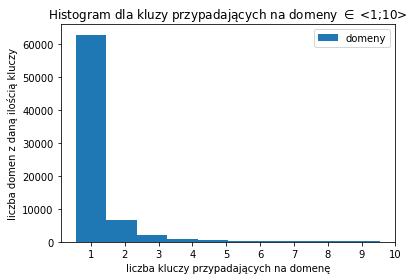

In [80]:
pd_no_keys.loc[pd_no_keys.iloc[:,1] < 11, :].plot.hist( bins = 10, align='left')
plt.legend(['domeny'])
plt.xticks(range(1,11))
plt.title(r'Histogram dla kluzy przypadających na domeny $\in$ <1;10>')
plt.xlabel('liczba kluczy przypadających na domenę')
plt.ylabel('liczba domen z daną ilością kluczy')

Text(0,0.5,'liczba domen z daną ilością kluczy')

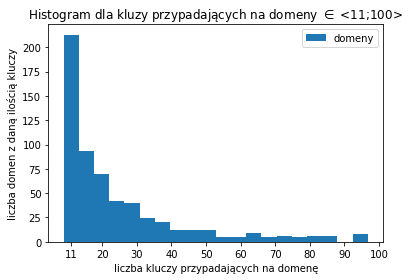

In [83]:
pd_no_keys.loc[(pd_no_keys.iloc[:,1] < 101) & (pd_no_keys.iloc[:,1] > 10), :].plot.hist(bins = 20, align='left')
x_t = [i for i in range(10,101,10)]
x_t[0] = 11
plt.xticks(x_t)
plt.title(r'Histogram dla kluzy przypadających na domeny $\in$ <11;100>')
plt.legend(['domeny'])
plt.xlabel('liczba kluczy przypadających na domenę')
plt.ylabel('liczba domen z daną ilością kluczy')

Text(0,0.5,'liczba domen z daną ilością kluczy')

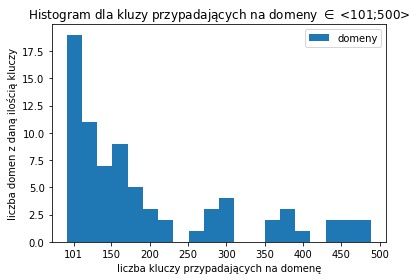

In [89]:
pd_no_keys.loc[(pd_no_keys.iloc[:,1] < 501) & (pd_no_keys.iloc[:,1] > 100), :].plot.hist(bins = 20, align='left')
x_t = [i for i in range(100,501,50)]
x_t[0] = 101
plt.xticks(x_t)
plt.title(r'Histogram dla kluzy przypadających na domeny $\in$ <101;500>')
plt.legend(['domeny'])
plt.xlabel('liczba kluczy przypadających na domenę')
plt.ylabel('liczba domen z daną ilością kluczy')

Text(0,0.5,'liczba domen z daną ilością kluczy')

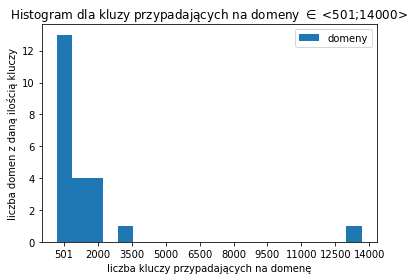

In [103]:
pd_no_keys.loc[(pd_no_keys.iloc[:,1] > 500), :].plot.hist(bins = 20, align='left')
x_t = [i for i in range(500,14501,1500)]
x_t[0] = 501
plt.xticks(x_t)
plt.title(r'Histogram dla kluzy przypadających na domeny $\in$ <501;14000>')
plt.legend(['domeny'])
plt.xlabel('liczba kluczy przypadających na domenę')
plt.ylabel('liczba domen z daną ilością kluczy')

#### plotting keys

In [11]:
if False:
    keys_list = pd_no_keys.loc[:,1].values.tolist()
    
    keys_list.sort()
    keys_list = np.array(keys_list)
    
    plt.figure(figsize=(10,5))
    plt.plot(keys_list[keys_list>1], 'o')

#### TO DO : for each key find main domain and reduce number of keys to this one domain

In [113]:
key_13000 = pd_no_keys.loc[ (pd_no_keys.iloc[:,1] > 13000),'0'].values.tolist()[0]
key_13000

"b'-----BEGIN PUBLIC KEY-----\\nMIIBIjANBgkqhkiG9w0BAQEFAAOCAQ8AMIIBCgKCAQEAzWJP5cMThJgMBeTvRKKl\\n7N6ZcZAbKDVAtNBNnRhIgSitXxCzKtt9rp2RHkLn76oZjdNO25EPp+QgMiWU/rkk\\nB00Y18Oahw5fi8s+K9dRv6i+gSOiv2jlIeW/S0hOswUUDH0JXFkEPKILzpl5ML7w\\ndp5kt93vHxa7HswOtAxEz2WtxMdezm/3CgO3sls20wl3W03iI+kCt7HyvhGy2aRP\\nLhJfeABpQr0Uku3q6mtomy2cgFawekN/X/aH8KknX799MPcuWutM2q88mtUEBsuZ\\nmy2nsjK9J7/yhhCRDzOV/yY8c5+l/u/rWuwwkZ2lgzGp4xBBfhXdr6+m9kmwWCUm\\n9QIDAQAB\\n-----END PUBLIC KEY-----\\n'"

In [187]:
pd_key.loc[pd_key.loc[:,'Key'] == key_13000, 'Domain'].values.tolist()

['blogspot.com',
 'google.com',
 'doubleclick.net',
 'i9.ytimg.com',
 'tpc.googlesyndication.com',
 'webmproject.org',
 'waymo.com',
 'whatbrowser.org',
 'photos1.blogger.com',
 'i2.ytimg.com',
 'pubsubhubbub.googlecode.com',
 'googleblog.com',
 'android-review.googlesource.com',
 'googleusercontent.com',
 'youtube.com',
 'webpjs.appspot.com',
 'googleapis.com',
 'cap-validator.appspot.com',
 'click.google-analytics.com',
 'boringssl.googlesource.com',
 'blog.golang.org',
 'cloudconnect.goog',
 'socghop.appspot.com',
 'graffneck-smichov.business.site',
 'theamauri321.business.site',
 'aahhoo.negocio.site',
 'recaptcha.net',
 'android.googlesource.com',
 'w5hv9.app.goo.gl',
 'e22s5.app.goo.gl',
 'youtubego.com',
 'youtubekids.com',
 'reward-redemption.appspot.com',
 'geo0.ggpht.com',
 'geo3.ggpht.com',
 'guidelines.raterhub.com',
 'pt.advertisercommunity.com',
 'health-lifesci.schema.org',
 'chromium.org',
 'crbug.com',
 'maps.app.goo.gl',
 'static.panoramio.com',
 'play.golang.org',
 '

In [188]:
#mapping functions to make domains the same
#https://stackoverflow.com/questions/42742711/pandas-select-slice-then-map-function-over-columns
pd_key['Domain'] = pd_key['Domain'].map(lambda x: "doubleclick.net" if "doubleclick.net" in x else x)
pd_key['Domain'] = pd_key['Domain'].map(lambda x: "blogspot.com" if "blogspot." in x else x)
pd_key['Domain'] = pd_key['Domain'].map(lambda x: "googleblog.com" if "googleblog." in x else x)

In [189]:
pd_key.loc[ pd_key.loc[:,'Domain'] == 'googleapis.com', :]

,Domain,Key
13174,googleapis.com,b'-----BEGIN PUBLIC KEY-----\nMIIBIjANBgkqhkiG...
124725,googleapis.com,b'-----BEGIN PUBLIC KEY-----\nMIIBIjANBgkqhkiG...


In [190]:
pd_key.drop_duplicates(inplace=True) 

In [185]:
pd_key.loc[ pd_key.loc[:,'Domain'] == "googleusercontent.com", :]

,Domain,Key
11543,googleusercontent.com,b'-----BEGIN PUBLIC KEY-----\nMIIBIjANBgkqhkiG...
197856,googleusercontent.com,b'-----BEGIN PUBLIC KEY-----\nMIIBIjANBgkqhkiG...


### Ratio

In [35]:
print('domens:', np.sum(pd_no_keys[1].values))
print('share key:', np.sum(pd_no_keys[1].values[pd_no_keys[1].values > 1]))
print('ratio:', np.sum(pd_no_keys[1].values[pd_no_keys[1].values > 1])/np.sum(pd_no_keys[1].values))

domens: 167421
share key: 104600
ratio: 0.624772280657743


In [36]:
pd_no_keys.loc[pd_no_keys.loc[:,1] > 2,:].sort_values(by=[1],ascending=False)

,0,1
304,b'-----BEGIN PUBLIC KEY-----\nMIIBIjANBgkqhkiG...,13997
26,b'-----BEGIN PUBLIC KEY-----\nMIIBIjANBgkqhkiG...,3608
7,b'-----BEGIN PUBLIC KEY-----\nMIIBIjANBgkqhkiG...,2255
22,b'-----BEGIN PUBLIC KEY-----\nMIIBIjANBgkqhkiG...,2155
27,b'-----BEGIN PUBLIC KEY-----\nMFkwEwYHKoZIzj0C...,2129
...,...,...
17325,b'-----BEGIN PUBLIC KEY-----\nMIIBIjANBgkqhkiG...,3
17324,b'-----BEGIN PUBLIC KEY-----\nMIIBIjANBgkqhkiG...,3
17292,b'-----BEGIN PUBLIC KEY-----\nMIIBIjANBgkqhkiG...,3
3657,b'-----BEGIN PUBLIC KEY-----\nMIICIjANBgkqhkiG...,3


## Duplikaty

In [96]:
keys_2 = pd_no_keys.loc[pd_no_keys.loc[:,1] == 2, 0]
keys_3 = pd_no_keys.loc[pd_no_keys.loc[:,1] == 3, 0]
keys_3

8        b'-----BEGIN PUBLIC KEY-----\nMIIBIjANBgkqhkiG...
97       b'-----BEGIN PUBLIC KEY-----\nMIIBIjANBgkqhkiG...
98       b'-----BEGIN PUBLIC KEY-----\nMIIBIjANBgkqhkiG...
110      b'-----BEGIN PUBLIC KEY-----\nMIIBIjANBgkqhkiG...
114      b'-----BEGIN PUBLIC KEY-----\nMIIBIjANBgkqhkiG...
                               ...                        
64911    b'-----BEGIN PUBLIC KEY-----\nMIIBIjANBgkqhkiG...
66249    b'-----BEGIN PUBLIC KEY-----\nMIIBIjANBgkqhkiG...
66375    b'-----BEGIN PUBLIC KEY-----\nMIIBIjANBgkqhkiG...
69350    b'-----BEGIN PUBLIC KEY-----\nMIICIjANBgkqhkiG...
71344    b'-----BEGIN PUBLIC KEY-----\nMIIBIjANBgkqhkiG...
Name: 0, Length: 1935, dtype: object

In [69]:
for k in keys_2:
    pd_no_keys.loc[pd_no_keys.loc[:,0] == k, 1] = 1

b'-----BEGIN PUBLIC KEY-----\nMIIBIjANBgkqhkiG9w0BAQEFAAOCAQ8AMIIBCgKCAQEA8RIetY9wUC8m4CUYcCmS\npIZ3BWzO9cEXymyiaEOgchZkq2dQokfpa1armjXYVVRj30MDdnx8TrDbUP9Mn0x/\n/gbP5R4mjeNQQstHuBzOyToSYaMc4ZHQz2zdpkB+MQqe+Z41FYdagjVFFsf4ozMc\n+qmZUDFxzq2ZoSPNlKBjzmSoG9nsrORwA4YyjT5orkhfUzWaime8jb5rI1wEx7j7\ng4sqMvbKLKaP6uhmIX80DY1/jtEZOTK8zOiafsXx/Q+Hb9bvVS3O4V9yHGd051Lv\nab21f6NNd0NLE3gdNfU/joTrtz1QlNBbGdJr2KaDoWF4avs9BtutNZ5oD/yI+GdU\nEwIDAQAB\n-----END PUBLIC KEY-----\n'
b'-----BEGIN PUBLIC KEY-----\nMIIBIjANBgkqhkiG9w0BAQEFAAOCAQ8AMIIBCgKCAQEApsx8vBmcSUy5U4wYLloS\nucGCDgdrDXoUwMGKhB5Y1dRUChwKb9jBufkHxZTk3FZIvCzbBpkB0foLBoDRMZOe\n/cdIEbXeTJx0EW+jHv+TXlIaVJ8ZJhN9pEDYbZ50SWbUyzfrJYujTRCE+iN12SSg\nv7w+iQpE3sWXix6wJOoh7H3qhFGMiw0tb9WmQ/l27O3gpH18HX83zl9V27vdtwU3\nhgmy2zGghPftJmuKSwE1QW58m3E831+9aFbgFuc6du81CsFSlsaH4uQdLGmcf1Mg\nqYgs0K06Nx9QsdMhmGyPnADF4LWUzV70XsKj4RhUQUbCN3vqT5GmLa2xyDk1bPua\nQQIDAQAB\n-----END PUBLIC KEY-----\n'
b'-----BEGIN PUBLIC KEY-----\nMIIBIjANBgkqhkiG9w0BAQEFAAOCAQ8AMIIBCgKCAQ

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [95]:
list_1 = pd_key.loc[pd_key.loc[:,'Key'] == keys_2.values[3], 'Domain'].values.tolist()
list_1

['nationalparkradio.com', 'designm.ag']

### Take list of domains for given key

In [104]:
list_1 = pd_key.loc[pd_key.loc[:,'Key'] == keys_3.values[4], 'Domain'].values.tolist()
list_1

['ias.pteducation.com', 'reslib.pteducation.com', 'pteducation.com']

### Common prefix

In [103]:
os.path.commonprefix(list_1)

''

### Common part of domain

In [112]:
test_list = [list_i.split('.')[:-1] for list_i in list_1]
test_list

[['ias', 'pteducation'], ['reslib', 'pteducation'], ['pteducation']]

In [114]:
res = list(reduce(lambda i, j: i & j, (set(x) for x in test_list))) 
res

['pteducation']

# Key to number
#### wybierz klucz z ramki danych

In [39]:
key_str = pd_no_keys.loc[pd_no_keys.loc[:,1] > 1,:].sort_values(by=[1],ascending=False).iloc[0,0]

#### oczyść z \\\n oraz początku i końca

In [48]:
key_clean = key_str[30:-29].replace('\\n', '')
key_clean

'MIIBIjANBgkqhkiG9w0BAQEFAAOCAQ8AMIIBCgKCAQEAzWJP5cMThJgMBeTvRKKl7N6ZcZAbKDVAtNBNnRhIgSitXxCzKtt9rp2RHkLn76oZjdNO25EPp+QgMiWU/rkkB00Y18Oahw5fi8s+K9dRv6i+gSOiv2jlIeW/S0hOswUUDH0JXFkEPKILzpl5ML7wdp5kt93vHxa7HswOtAxEz2WtxMdezm/3CgO3sls20wl3W03iI+kCt7HyvhGy2aRPLhJfeABpQr0Uku3q6mtomy2cgFawekN/X/aH8KknX799MPcuWutM2q88mtUEBsuZmy2nsjK9J7/yhhCRDzOV/yY8c5+l/u/rWuwwkZ2lgzGp4xBBfhXdr6+m9kmwWCUm9QIDAQAB'

#### zamień na liczbę

In [49]:
key_int = int.from_bytes(key_clean.encode(), 'little')
key_int

27736142053001972894141168940794628257122595916689500327337814341233702579571191726171192003997939169360692208972473464481406697865724011100281443278195278731581691888597354870140246748527444181992252960189151142429554895594863583933923480159126397675192644829119313833703381348968107358436189284486758101278432697304788189716200964589051457558010627706789891951021560856034917805031622495121390702751622947874597999855708672897851711176185905178728389036613779517873556148898466029667317655253909482911745643898582334852578745527682659988105625551105956650520112190774383411319292036989510245130812474077825149865366508826306186444989755628705474943049498460670576842747728621377488734773120353865848580006325434517215958345375320127948921509092572086071871468998600692328490902561812395023297361667096083466166049262940079979675425955889450823899265465043743768226651703902405844287893956335783700461288503339388260968956568468069414657935693